<a href="https://colab.research.google.com/github/mmkeyes140/energy_reflections/blob/main/mini_astro_rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome! To run your personal astrology report, update personalization information, then use Ctrl-F9 to generate content.



### Install and import all necessary components

In [ ]:
# begin importing required libraries
!pip install kerykeion

from kerykeion import Report, AstrologicalSubject
import pandas as pd
import ast
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import colorsys
import urllib.request
import urllib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.4/303.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2023.4
    Uninstalling pytz-2023.4:
      Successfully uninstalled pytz-2023.4


# Input for personalization
Enter name and birth information to pull customized energy report

In [ ]:
client_name = "Jeff" # @param {type:"string"}
birth_date = "1964-07-12" # @param {type:"date"}
birth_time = "11:00 pm" # @param {type:"string"}
birth_zone = "EST" # @param {type:"string"}

# Create report

### Load external content
Content for the report is generated via LLM and based on traditional

In [ ]:
# load miniReport content
mini_content_path = urllib.request.Request('https://6d51241e-d0e3-44ea-a553-7794524e08ee.usrfiles.com/ugd/6d5124_ab0adf1c3b7a4634ae4a1939e2911a09.txt')

# load XLS containing traits list
xlsWordList = 'https://6d51241e-d0e3-44ea-a553-7794524e08ee.usrfiles.com/ugd/6d5124_0b44cd8f0d67436ea230b5090a720f71.xlsx'

with urllib.request.urlopen(mini_content_path) as file:
  content = file.read()

content = content.decode('utf-8')
data_mini_content = ast.literal_eval(content)



### Convert input and compile planetery


In [ ]:
# convert input to Kerykeion required format
year, month, day = birth_date.split('-')
birth_yr = int(year)
birth_mo = int(month)
birth_dy = int(day)
birth_time, time_pm = birth_time.split(" ")
time_hr, time_mi = birth_time.split(":")
birthHr = int(time_hr)
birthMi = int(time_mi)
if time_pm.lower() == 'pm':
  birthHr += 12


# combine details and pull planetary placements from Kerykion
subject = f'AstrologicalSubject("{client_name}", {birth_yr}, {birth_mo}, {birth_dy}, {birthHr}, {birthMi}, "{birth_zone}", "USA")' # Country not req for calc with time zone, default meet validation requirement
client = eval(subject)

In [ ]:
# functions positioned below customize/update links
# begin required functions

def sort_key(item):
  sign, attributes = item
  return lst_elements.index(attributes['ele']), lst_modality.index(attributes['mod'])


def lighten_color(hex_color, percentage):
  # Convert hex to RGB to HLS, lighten, and return to hex
  hex_color = hex_color.lstrip('#')
  rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
  hls = colorsys.rgb_to_hls(rgb[0]/255, rgb[1]/255, rgb[2]/255)
  lightened_color = colorsys.hls_to_rgb(hls[0], max(min(1, hls[1] * (1 + percentage)), 0), hls[2])
  return "#{:02x}{:02x}{:02x}".format(int(lightened_color[0]*255), int(lightened_color[1]*255), int(lightened_color[2]*255))



## Point of Fortune calculations
The Point of Fortune, (aka Lot of Fortune) of a natal chart if found by using the absolute positions of multiple planets, along with the location of the First House. Calculation method varies by time of birth.  

In [ ]:
# calculated Lot of Fortune
lst_zodiac_signs_abbr = ["Ari", "Tau", "Gem", "Can", "Leo", "Vir", "Lib", "Sco", "Sag", "Cap", "Aqu", "Pis"]

# determine if Natal Chart is a day or night chart
dayChart = ['Seventh House', 'Eighth House', 'Ninth House', 'Tenth House', 'Eleventh House', 'Twelfth House']

# find absolute value of Lot of Fortune placement
if client.sun['house'] in dayChart:
    absLoF = client.first_house['abs_pos'] + client.moon['abs_pos'] - client.sun['abs_pos']
else:
    absLoF = client.first_house['abs_pos'] + client.sun['abs_pos'] - client.moon['abs_pos']

# convert absolute value to Zodiac sign, which changes at each 30th degree
signLoF = lst_zodiac_signs_abbr[int(absLoF//30)]

In [ ]:
# Build custom report
lst_mini_content = []

for dict_planet in data_mini_content:
  try:
    planet_call = f'client.{dict_planet}'
    planet_name = eval(planet_call)
    planet_local = planet_name['sign']
    content = data_mini_content[dict_planet][planet_local]

  except:
    content = data_mini_content['ptFortune'][signLoF]
  lst_mini_content.append(content)

str_mini_content = 'Optimize your placements: \n'

for c in lst_mini_content:
  str_mini_content = str_mini_content + '\n' + c


## Weighting placements
Weighing sign based on the placements of planets and some of the houses. Sign weights to be used for graphics.



In [ ]:
# Planet data required for scoring model
lst_pl_score = [{'planet': 'Sun', 'sign1': 'Leo', 'house1': 'Fifth_House', 'sign2': '', 'house2': '', 'aka': 'ego'}, {'planet': 'Moon', 'sign1': 'Can', 'house1': 'Fourth_House', 'sign2': '', 'house2': '', 'aka': 'emotions'},
{'planet': 'Mercury', 'sign1': 'Gem', 'house1': 'Third_House', 'sign2': 'Vir', 'house2': 'Sixth_House', 'aka': 'mind'},{'planet': 'Venus', 'sign1': 'Tau', 'house1': 'Second_House', 'sign2': 'Libra', 'house2': 'Seventh_House', 'aka': 'love'},
{'planet': 'Mars', 'sign1': 'Ari', 'house1': 'First_House', 'sign2': '', 'house2': '', 'aka': 'action'}, {'planet': 'Jupiter', 'sign1': 'Sag', 'house1': 'Ninth_House', 'sign2': '', 'house2': '', 'aka': 'luck'},
{'planet': 'Saturn', 'sign1': 'Cap', 'house1': 'Tenth_House', 'sign2': '', 'house2': '', 'aka': 'discipline'}, {'planet': 'Uranus', 'sign1': 'Aqu', 'house1': 'Eleventh_House', 'sign2': '', 'house2': '', 'aka': 'innovation'},
{'planet': 'Neptune', 'sign1': 'Pis', 'house1': 'Twelfth_House', 'sign2': '', 'house2': '', 'aka': 'spirit'}, {'planet': 'Pluto', 'sign1': 'Sco', 'house1': 'Eighth_House', 'sign2': '', 'house2': '', 'aka': 'transformation'}]

# build Kerykeion planet results into internable list
planet_details = [
    client.sun, client.moon, client.mercury,
    client.venus, client.mars, client.jupiter,
    client.saturn, client.uranus, client.neptune,
    client.pluto, client.mean_node, client.chiron
    ]

elements = {'Fire':  0, 'Earth': 0, 'Air': 0, 'Water': 0}
modality = {'Cardinal': 0, 'Fixed': 0, 'Mutable': 0}
sign_counts = {}
dict_z_content = {}

# count planets in each element, quality/modality, sign
for element in elements:
  filtered_dicts = [d for d in planet_details if d['element'] == element]
  elements[element] += len(filtered_dicts)
for m in modality:
  filtered_dicts = [d for d in planet_details if d['quality'] == m]
  modality[m] += len(filtered_dicts)

for zsa in lst_zodiac_signs_abbr:
  filtered_dicts = [d for d in planet_details if d['sign'] == zsa]
  sign_counts[zsa] = len(filtered_dicts)


# add to count based on 4 primary house placements
key_houses = ['First_House', 'Fourth_House', 'Seventh_House', 'Twelfth_House']
for house in key_houses:
    house_call = f'client.{house.lower()}'
    house_data = eval(house_call)
    house_local = house_data['sign']
    house_modality = house_data['quality']
    house_quality = house_data['element']
    sign_counts[house_local] += 1
    modality[house_modality] += 1

# add to count for key planets
sign_counts[client.sun['sign']] += 1
sign_counts[client.moon['sign']] += 1
modality[client.sun['quality']] += 1
modality[client.moon['quality']] += 1
elements[client.sun['element']] += 1
elements[client.moon['element']] += 1


dict_signs = {}
modality_count = 0
element_count = 0
lst_modality = list(modality.keys())
lst_elements = list(elements.keys())
for s in lst_zodiac_signs_abbr:
  mod_breakdown = lst_modality[modality_count]
  elem_breakdown = lst_elements[element_count]
  dict_sign_detail = {}
  dict_sign_detail['mod'] = lst_modality[modality_count]
  dict_sign_detail['ele'] = lst_elements[element_count]
  # control iternation for correct assignment to signs
  if modality_count < 2: # rotate through modalitys
    modality_count += 1
  else:
    modality_count = 0
  if element_count < 3:
    element_count += 1
  else:
    element_count = 0
  dict_signs[s] = dict_sign_detail

for ds in dict_signs:
  count = sign_counts.get(ds)
  #print(ds, count)
  dict_signs[ds]['count'] = count +1

sorted_dict = dict(sorted(dict_signs.items(), key=sort_key))

print('Sign counts now complete.')

Sign counts now complete.


# Create WordCloud
Create a list of traits based off planetary placements. Steps include pulling list of traits from xls format, replicating based on the strength of sign the planet sits in.



In [ ]:
#compile list of traits into string
lst_weighted_traits = []

sign_tracking = []

# iternate through planets pulling traits for each one
for planet in planet_details:
  name = planet['name']
  if name == 'Mean_Node':
    break
  else:
    sign = planet['sign']
    sign_tracking.append(sign)
    weight = sign_counts[sign]
    weight -= sign_tracking.count(sign) # reduce weight for each previous itneration of sign

    # URL of the Excel file
    xls_url = 'https://6d51241e-d0e3-44ea-a553-7794524e08ee.usrfiles.com/ugd/6d5124_0b44cd8f0d67436ea230b5090a720f71.xlsx'
    df_traits = pd.read_excel(xls_url, sheet_name= name)
    # Display the DataFrame

    trait_call = f"{sign.lower()}_pos" #retrieve only positive traits
    lst_planet_traits = df_traits[trait_call].tolist()
    for n in range(weight): #repeat list for each
      lst_weighted_traits.extend(lst_planet_traits)

random.shuffle(lst_weighted_traits) #Randomize list to minimize replicating repeats

str_traits_list = ' '.join(lst_weighted_traits)


In [ ]:
# Colors provided to represent energy, energy color is then adjusted to represent the quality

color_set = {'Fire':  '#bb3a32', 'Earth': '#5a9d40', 'Air': '#e58637', 'Water':  '#4a76af'}

inner_colors = []
outer_colors = []
for color in color_set.values():
    outer_colors.append(color)
    outer_colors.append(lighten_color(color, 0.4))
    inner_colors.append(lighten_color(color, 0.4))
    outer_colors.append(lighten_color(color, 0.7))

In [ ]:
# Provide alternative, descriptive names for titles
modalityVerbsTtl = ['To Begin', 'To Complete', 'To Change']
elementNounTtl = ['Actions', 'Stamina', 'Thoughts', 'Feelings']

# Calculate total count
total_count = sum(sign['count'] for sign in sorted_dict.values())

# Prepare data for the inner circle (elements)
ele_counts = {ele: 0 for ele in color_set}
for sign in sorted_dict.values():
    ele_counts[sign['ele']] += sign['count']
ele_labels = list(ele_counts.keys())
ele_sizes = [count / total_count for count in ele_counts.values()]

# Prepare data for the outer ring (individual signs)
outer_labels = []
outer_sizes = []

for sign, attributes in sorted_dict.items():
    ele = attributes['ele']
    mod = attributes['mod']
    count = attributes['count']
    outer_labels.append(sign)
    outer_sizes.append(count / total_count)


# Results

(-0.5, 799.5, 1199.5, -0.5)

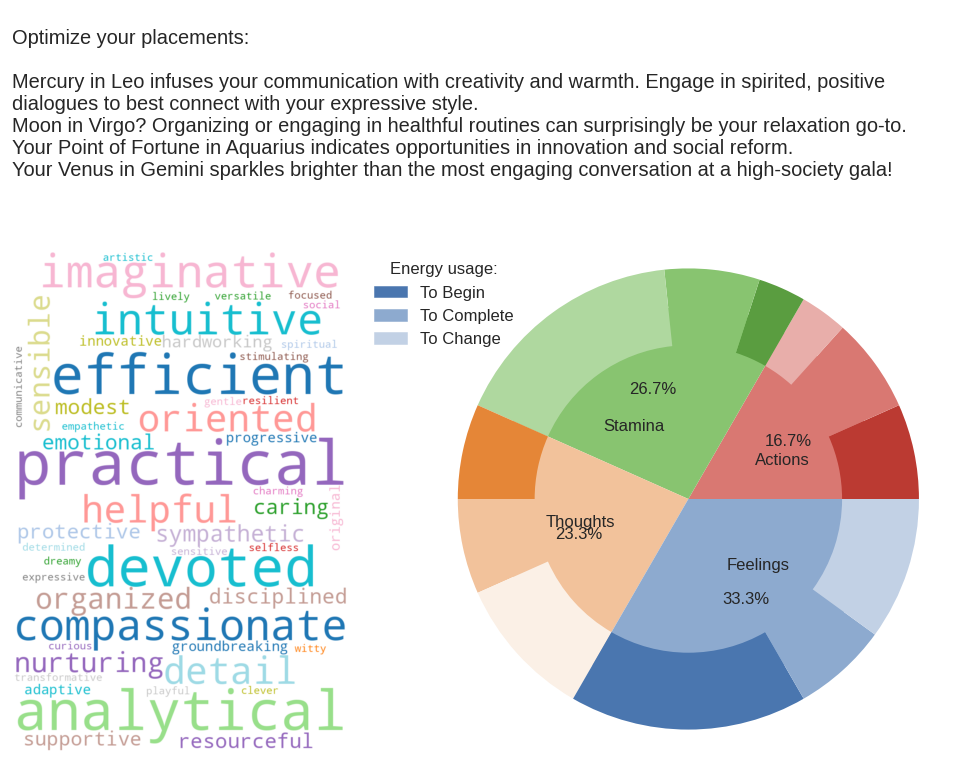

In [ ]:
# Create grid shape
# Plotting
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(10,8), dpi=120)
fig.tight_layout()

grid = GridSpec(2,2, width_ratios=[2,3], height_ratios=[1,3])

c1 = fig.add_subplot(grid.new_subplotspec((0,0), colspan=2))
c2r1 = fig.add_subplot(grid[2])
c2r2 = fig.add_subplot(grid[3])

c1.axis('off')
c1.text(0 , 0.90, str_mini_content, fontsize=12, transform=c1.transAxes, ha = 'left', va='top', wrap=True).set_clip_on(True)


# begin pie chart plot
c2r2.pie(ele_sizes, radius= 1, colors= inner_colors,labels=elementNounTtl, autopct='%1.1f%%', startangle=0, wedgeprops=dict(width=1), labeldistance = 0.4)
c2r2.pie(outer_sizes, radius = 1.2, colors= outer_colors, wedgeprops=dict(width=0.4))

# Legend for pie chart
legend_labels = modalityVerbsTtl.copy()
legend_colors = outer_colors[9:12]
patches = [mpatches.Patch(color=legend_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
c2r2.legend(handles=patches, title="Energy usage:", loc="upper left", bbox_to_anchor=(-0.15, 0.5, 0.5, 0.5))
c2r2.axis('equal')

# Begin wordCloud
wordcloud = WordCloud(height=1200, width= 800, background_color= 'white', max_words=90, colormap='tab20',).generate(str_traits_list)
c2r1.imshow(wordcloud, interpolation='bilinear')
c2r1.axis("off")
